# Introduction

In [0]:
# Problem : 
# sequence classification
# input          : "this is very good" 
# target         : Good
# All categories :  Good, Bad , Neutral
#
# sequence tagging
# "Camera is very good and display is also nice" 
#    A.   NA.  NA. NA.  NA.  A.    NA. NA.  NA.
# All categories: Attribute, Not-a-attribute

In [0]:
# Padding
# Sample dataset:
# s1: display is very good  : 4
# s2: camera is good        : 3
# s3: battery is bad        : 3

# s1: display is very good  : 4
# s2: camera is good <pad>  : 4
# s3: battery is bad <pad>  : 4
# <pad> = [0,0,0,0,0]

In [0]:
# Count vectorizer for representing all the words present in our sentence
# s1: display is very good  : CV
# s1: display is very good  : TFIDF
# s1: display is very good  : NMF   # 
# s1: display is very good  : Words can be represented as n-dimension vectors : skip-gram, CBOW  

In [0]:
# NMF : document matrix    word matrix
# 5 documents --> 10 words. 
# NMF --> dimension = 3
# document matrix 5*3
# word matrix 10*3


# display [1,1,2]
# is [1,1,1]
# good [1,0,1]
#...
# w10


In [0]:
# sentence = display is good
# CV == no neurons in input layer == Vocab size
# NMF == no neurons in input layer == dimension in NMF

#     












# Sequence tagging task

## Reading the data

In [1]:
# Read data
import pandas as pd
import numpy as np

data = pd.read_csv("./rnn_data.csv")

In [2]:
# Understand your data
data.head(2)

,product_description,meta_description,description,bread_crumb,highlights,formated_reviews
0,NaN,"Buy Moto G5s (Lunar Gray, 32 GB) online at bes...",NaN,Home > Mobiles & Accessories > Mobiles > Motor...,[],"['Nice Good but over priced', 'Absolute rubbis..."
1,NaN,Buy Imported ShengShow Gold Mirror Rubik Magic...,Very Good Fantastic Product. No compromise on ...,Home > Toys > Puzzles & Board Games > Puzzles ...,[],"['Really Nice Smooth', 'Excellent It is a good..."


In [3]:
# create X representing input
X = data['review']

KeyError: 'review'

In [0]:
# create y representing target
y = data['tags']

In [0]:
# feature
X[0]

'camera of this phone is good'

In [0]:
# target
y[0]

'ATTR NATTR NATTR NATTR NATTR NATTR'

## Vocab creation

In [0]:
# Create vocab
vocab = []
for review in X:
  review = review.lower().split(" ")
  vocab.extend(review)
vocab = list(set(vocab))
vocab.append("<PAD>")
len(vocab)

75

In [0]:
# idx to word mapping
idx_to_word = {idx:vocab[idx] for idx in range(len(vocab))}
# word to id mapping
word_to_idx = {idx_to_word[idx]:idx for idx in idx_to_word}


## Padding

In [0]:
# X --> feature
# y --> target
# vocab
# idx_to_word
# word_to_idx

In [0]:
# Find sentence with maximum words and find the number of words present in it
max_len_sentence = None # "Str" this particular sentence will have max no of words compared to any other sample
max_len = 0 # Number of words present in the sentence "max_len_sentence"
for sen in X:
  no_of_words = len(sen.split())
  if no_of_words>max_len:
    max_len = no_of_words
    max_len_sentence = sen
max_len_sentence, max_len

('quality and service of this product is good', 8)

In [0]:
# Pad all the sentences if sentence size is less than max_len 
# <PAD>
X = [X[idx].split() + ["<PAD>"] * (max_len - len(X[idx].split()) ) for idx in range(len(X))]
# print x
X

[['camera', 'of', 'this', 'phone', 'is', 'good', '<PAD>', '<PAD>'],
 ['screen', 'size', 'is', 'very', 'bad', '<PAD>', '<PAD>', '<PAD>'],
 ['quality', 'of', 'the', 'material', 'is', 'awesome', '<PAD>', '<PAD>'],
 ['phone', 'size', 'is', 'super', '<PAD>', '<PAD>', '<PAD>', '<PAD>'],
 ['display', 'of', 'the', 'phone', 'is', 'great', '<PAD>', '<PAD>'],
 ['battery', 'life', 'is', 'incredible', '<PAD>', '<PAD>', '<PAD>', '<PAD>'],
 ['cloth', 'texture', 'and', 'materials', 'are', 'great', '<PAD>', '<PAD>'],
 ['this', 'has', 'got', 'stupid', 'material', '<PAD>', '<PAD>', '<PAD>'],
 ['delivery', 'of', 'this', 'product', 'took', 'long', 'time', '<PAD>'],
 ['screen', 'glass', 'has', 'been', 'broken', '<PAD>', '<PAD>', '<PAD>'],
 ['this', 'is', 'an', 'excellent', 'camera', '<PAD>', '<PAD>', '<PAD>'],
 ['phone', 'software', 'is', 'so', 'worst', '<PAD>', '<PAD>', '<PAD>'],
 ['smell', 'of', 'the', 'perfume', 'is', 'good', '<PAD>', '<PAD>'],
 ['the', 'surface', 'is', 'very', 'smooth', 'and', 'clear', 

In [0]:
X[0]

['camera', 'of', 'this', 'phone', 'is', 'good', '<PAD>', '<PAD>']

In [0]:
y[0]

'ATTR NATTR NATTR NATTR NATTR NATTR'

In [0]:
# pad all tags if length is less than max_len
y = [y[idx].split() + ["NATTR"] * (max_len - len(y[idx].split()) ) for idx in range(len(y))]
# print y
y

[['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'NATTR', 'NATTR', 'NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'NATTR', 'NATTR', 'NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATT

In [0]:
np.array(X).shape, np.array(y).shape

((25, 8), (25, 8))

## Numerising the data

In [0]:
# X --> feature
# y --> target
# vocab
# idx_to_word
# word_to_idx
# padding

In [0]:
X

[['camera', 'of', 'this', 'phone', 'is', 'good', '<PAD>', '<PAD>'],
 ['screen', 'size', 'is', 'very', 'bad', '<PAD>', '<PAD>', '<PAD>'],
 ['quality', 'of', 'the', 'material', 'is', 'awesome', '<PAD>', '<PAD>'],
 ['phone', 'size', 'is', 'super', '<PAD>', '<PAD>', '<PAD>', '<PAD>'],
 ['display', 'of', 'the', 'phone', 'is', 'great', '<PAD>', '<PAD>'],
 ['battery', 'life', 'is', 'incredible', '<PAD>', '<PAD>', '<PAD>', '<PAD>'],
 ['cloth', 'texture', 'and', 'materials', 'are', 'great', '<PAD>', '<PAD>'],
 ['this', 'has', 'got', 'stupid', 'material', '<PAD>', '<PAD>', '<PAD>'],
 ['delivery', 'of', 'this', 'product', 'took', 'long', 'time', '<PAD>'],
 ['screen', 'glass', 'has', 'been', 'broken', '<PAD>', '<PAD>', '<PAD>'],
 ['this', 'is', 'an', 'excellent', 'camera', '<PAD>', '<PAD>', '<PAD>'],
 ['phone', 'software', 'is', 'so', 'worst', '<PAD>', '<PAD>', '<PAD>'],
 ['smell', 'of', 'the', 'perfume', 'is', 'good', '<PAD>', '<PAD>'],
 ['the', 'surface', 'is', 'very', 'smooth', 'and', 'clear', 

In [0]:
y

[['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'NATTR', 'NATTR', 'NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'NATTR', 'NATTR', 'NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['ATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR', 'NATTR'],
 ['NATTR', 'ATTR', 'NATTR', 'NATTR', 'NATT

In [0]:
# Numerise matrix X using word_to_idx map
# X[0][0]
# word_vector = [0]*len(vocab)
# idx = word_to_idx[X[0][0]]
# print(word_vector)
# word_vector[idx] = 1
# print(word_vector)

## vocab --> camera phone display material
## camera-->   1.     0.   0.      0
## word_to_idx['camera'] returns 0
numerized_X = [[[1 if idx==word_to_idx[word] else 0 for idx in range(len(vocab))] for word in sen] for sen in X]
print(numerized_X[0])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
# Numerise matrix y : Label 1 for "ATTR" and 0 for "NATTR"
numerized_y = [[1 if tag=="ATTR" else 0 for tag in sen] for sen in y]
numerized_y

[[1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0]]

## Write a batch function

In [0]:
# X --> feature
# y --> target
# vocab
# idx_to_word
# word_to_idx
# padding

In [0]:
np.array(numerized_X).shape, np.array(numerized_y).shape

((25, 8, 75), (25, 8))

In [0]:
# batch function
def get_batch(nu_x, nu_y, not_numerized_X, batch_size = 5):
  # no of samples = 21
  # batch_size = 5
  # 21/5 = 4 batches + 1 = 5 batches
  no_of_batches = len(nu_x)/batch_size
  if len(nu_x)%batch_size!=0:
    no_of_batches=no_of_batches+1
  for batch_id in range(int(no_of_batches)):
    start_index = (batch_id*batch_size)
    end_index = start_index + batch_size
    yield np.array(nu_x[start_index:end_index]), np.array(nu_y[start_index:end_index]), not_numerized_X[start_index:end_index]

In [0]:
input_,target_,message_ = next(get_batch(numerized_X, numerized_y, X, batch_size=5))
input_.shape, target_.shape, message_,target_

((5, 8, 75),
 (5, 8),
 [['camera', 'of', 'this', 'phone', 'is', 'good', '<PAD>', '<PAD>'],
  ['screen', 'size', 'is', 'very', 'bad', '<PAD>', '<PAD>', '<PAD>'],
  ['quality', 'of', 'the', 'material', 'is', 'awesome', '<PAD>', '<PAD>'],
  ['phone', 'size', 'is', 'super', '<PAD>', '<PAD>', '<PAD>', '<PAD>'],
  ['display', 'of', 'the', 'phone', 'is', 'great', '<PAD>', '<PAD>']],
 array([[1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0]]))

In [0]:
np.array(numerized_X).shape, np.array(numerized_y).shape

((25, 8, 75), (25, 8))

## Model development

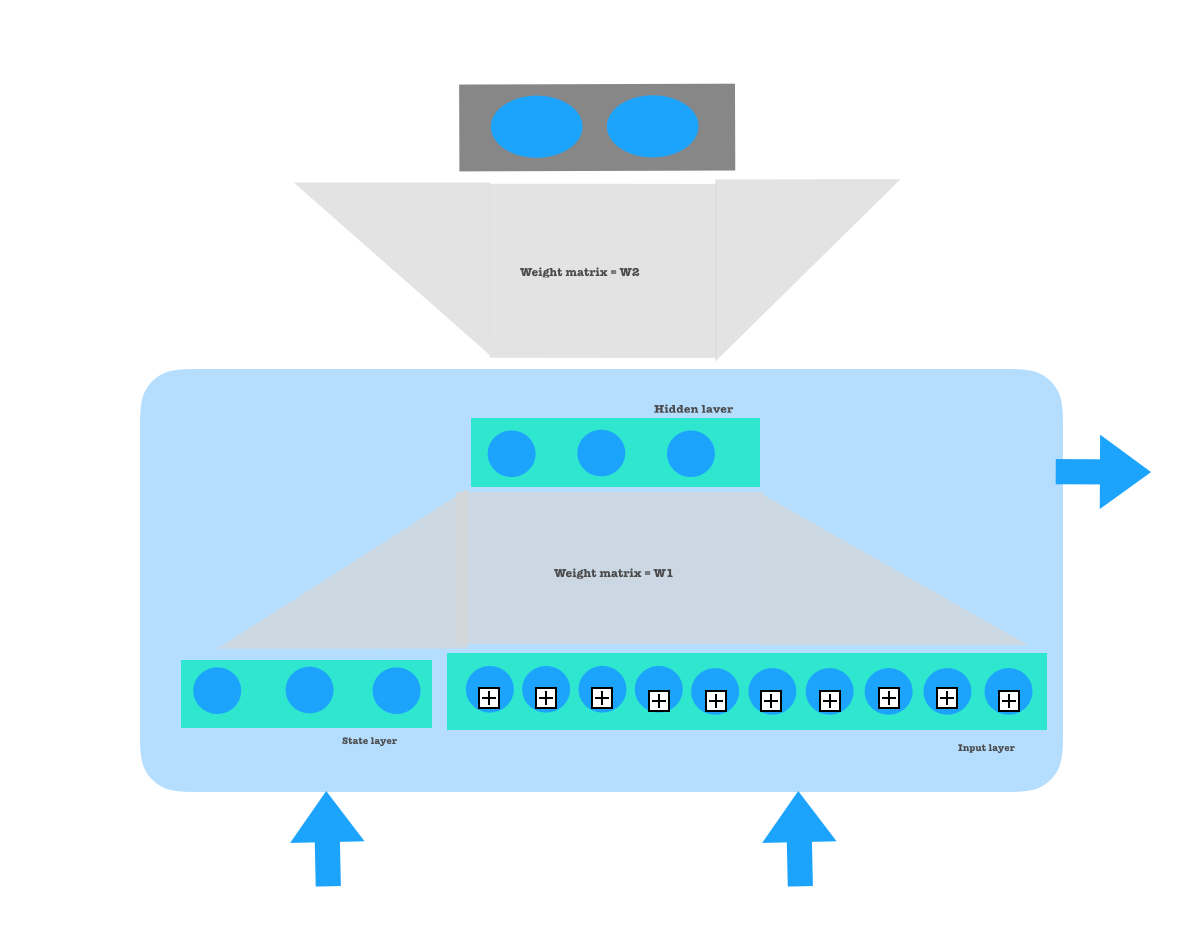

In [0]:
from IPython.display import Image
Image('rnn.png',width=200, height=200)

In [0]:
# W1 = (no_of_neurons_inpu+no_neurons_in_state_layer) * no_of_neurons_in_hidden_layer

In [0]:
import tensorflow as tf
tf.reset_default_graph()
################################################ ********* FEED FORWARD *********** ############################
# define number of neurons in hidden layer
hidden_neurons = 10
# define batch_size
batch_size = 5
# define number of classes / no of neurons in output layer
output_neurons = 1


########### INPUT ################
## Batch 1:
## Screen is good
## Battery is bad
## Camera is good
## Shape of batch input: ?
# placeholder for input data
input_ = tf.placeholder(tf.float32, [None, None, len(vocab)])


########### TAGET ################ 
## ATTR NATTR NATTR
## ATTR NATTR NATTR
## ATTR NATTR NATTR
## Shape of batch target: ?
# placeholder for target data
target_ = tf.placeholder(tf.float32,[None,max_len])


# placeholder for initial state layer inputs
init_state = tf.placeholder(tf.float32, [None, hidden_neurons])

# RNN cell 
# Define weight matrix
# Define bias matrix
W1 = tf.Variable(np.random.rand(len(vocab)+hidden_neurons, hidden_neurons), dtype=tf.float32)
b1 = tf.Variable(np.zeros((1,hidden_neurons)), dtype=tf.float32)

# Output layer
# Define  weight matrix
# Define bias matrix
W2 = tf.Variable(np.random.rand(hidden_neurons,output_neurons), dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,output_neurons)), dtype=tf.float32)


# Define current state and a list to save context vectors generated at each time step
context_vector = init_state
rnn_context_vectors = []
# feed forward through rnn
for time_step in range(max_len):
  current_input = input_[:,time_step,:]
  input_state_concat = tf.concat([current_input,context_vector],axis=1)
  
  # RNN cell ff
  context_vector = tf.nn.sigmoid(tf.matmul(input_state_concat,W1) + b1)
  rnn_context_vectors.append(context_vector)

# classifying words into different classes out side the RNN
logits = [tf.matmul(time_step_output,W2) + b2 for time_step_output in rnn_context_vectors]
act_logits = [tf.nn.sigmoid(l) for l in logits]

################################################ ********* Loss calculation *********** ############################
# squeeze output
logits = [tf.squeeze(l) for l in logits]
targets_ = tf.unstack(target_, axis=1)
losses = [tf.nn.softmax_cross_entropy_with_logits(logits=l, labels=t) for l,t in zip(logits,targets_)]
total_loss = tf.reduce_mean(losses)


################################################ ********* Optimization *********** ############################
optimize_ = tf.train.AdamOptimizer(0.5).minimize(total_loss)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# Training

#     












# Sequence classification task

In [0]:
# print x

In [0]:
# create y for sequence classification
y = data['classes']

In [0]:
#print(np.array(numerized_X))

In [0]:
# model development

In [0]:
# Training

#     












# Multi task models

In [0]:
# batch function
def get_batch(x,y1,y2,z,batch_size=5):
  no_of_batches = len(x)/batch_size
  if len(x)%batch_size!=0:
    no_of_batches+=1
  for batch_id in range(int(no_of_batches)):
    yield np.array(x[(batch_id*batch_size):(batch_id*batch_size)+batch_size]), \
    np.array(y1[(batch_id*batch_size):(batch_id*batch_size)+batch_size]),\
    np.array(y2[(batch_id*batch_size):(batch_id*batch_size)+batch_size]),\
    z[(batch_id*batch_size):(batch_id*batch_size)+batch_size]

In [0]:
# X,numerized_X

In [0]:
# define y1 = sequence tags ; y2 = sequence class

In [0]:
# model development

In [0]:
# training